In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle


In [2]:
Directory=r'C:\Users\Prithvi Ragavendiran\Downloads\archive (4)\PetImages'
categories=['Cat','Dog']

In [3]:
img_size = 100
data = []
for category in categories:
    folder = os.path.join(Directory, category)
    label = categories.index(category)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        try:
            img_arr = cv2.imread(img_path)
            if img_arr is not None and not img_arr.size == 0:
                img_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([img_arr, label])
            else:
                os.remove(img_path)
        except Exception as e:
            os.remove(img_path)

In [4]:
len(data)

24946

In [5]:
random.shuffle(data)

In [6]:
x = []
y = []

for features,labels in data:
    x.append(features)
    y.append(labels)

In [7]:
x=np.array(x)
y=np.array(y)

In [8]:
pickle.dump(x,open('x.pkl', 'wb'))
pickle.dump(y,open('y.pkl', 'wb'))

In [9]:
x.shape

(24946, 100, 100, 3)

In [10]:
y.shape

(24946,)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential 
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(x_train, y_train, batch_size=20, shuffle=True)
test_generator = test_datagen.flow(x_test, y_test, batch_size=20, shuffle=False)

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 10, 10, 128)       0

In [18]:
from tensorflow.keras import optimizers
from keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10


624/624 [==============================] - 282s 447ms/step - loss: 1.0022 - accuracy: 0.5584 - val_loss: 0.6870 - val_accuracy: 0.4998
Epoch 2/10
624/624 [==============================] - 278s 446ms/step - loss: 0.6041 - accuracy: 0.6700 - val_loss: 0.5813 - val_accuracy: 0.6972
Epoch 3/10
624/624 [==============================] - 292s 469ms/step - loss: 0.5345 - accuracy: 0.7329 - val_loss: 0.4962 - val_accuracy: 0.7615
Epoch 4/10
624/624 [==============================] - 140s 224ms/step - loss: 0.4691 - accuracy: 0.7771 - val_loss: 0.4254 - val_accuracy: 0.8044
Epoch 5/10
624/624 [==============================] - 102s 163ms/step - loss: 0.3993 - accuracy: 0.8157 - val_loss: 0.4819 - val_accuracy: 0.7737
Epoch 6/10
624/624 [==============================] - 103s 165ms/step - loss: 0.3482 - accuracy: 0.8438 - val_loss: 0.4065 - val_accuracy: 0.8176
Epoch 7/10
624/624 [==============================] - 102s 164ms/step - loss: 0.3005 - accuracy: 0.8708 - val_loss: 0.3905

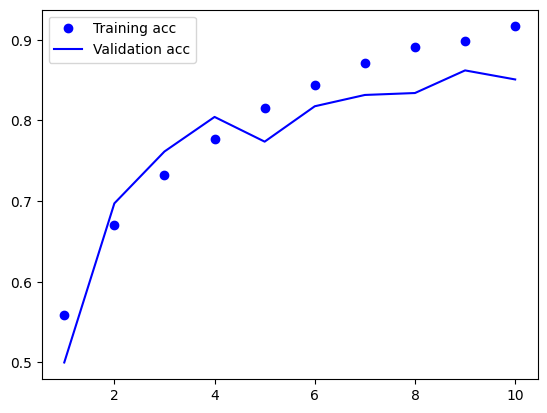

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

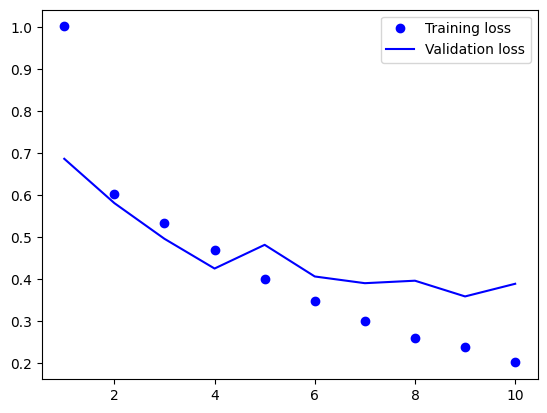

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

In [23]:
model.save('catvsdog.keras')

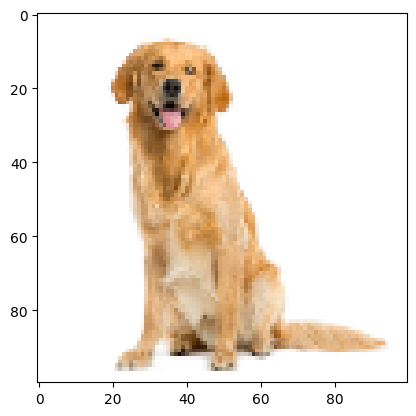

In [38]:
from tensorflow.keras.preprocessing import image
path ="C:\\Users\\Prithvi Ragavendiran\\Downloads\\Safeimagekit-resized-img (1).png"
img = image.load_img(path,target_size=(100,100))
plt.imshow(img,interpolation='nearest')
plt.show()

In [39]:
img_array = np.array(img)
img_array.shape

(100, 100, 3)

In [40]:
img_array=img_array.reshape(1,100,100,3)

In [44]:
a = model.predict(img_array)
if a[0][0]<0.5:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 47ms/step
dog


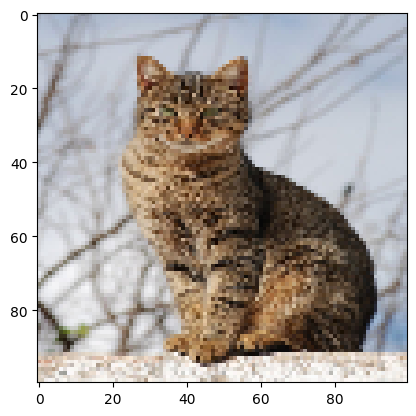

In [47]:
path ="D:\\New folder\\Safeimagekit-resized-img.png"
img1 = image.load_img(path,target_size=(100,100))
plt.imshow(img,interpolation='nearest')
plt.show()

In [48]:
img_array = np.array(img1)
img_array.shape

(100, 100, 3)

In [49]:
img_array=img_array.reshape(1,100,100,3)

In [50]:
b = model.predict(img_array)
if b[0][0]<0.5:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 49ms/step
cat
